## Data Pre Processing

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [16]:
X = np.array([[1, 2, 3],
             [1, 6, 4]])
scaler = StandardScaler().fit(X) # each column scale

scaler.mean_, scaler.var_

(array([1. , 4. , 3.5]), array([0.  , 4.  , 0.25]))

In [17]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 0., -1., -1.],
       [ 0.,  1.,  1.]])

In [18]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [19]:
X_scaled.std(axis=0)

array([0., 1., 1.])

In [22]:
X.argmax(axis=0, keepdims=True), X.argmax(axis=1, keepdims=True)

(array([[0, 1, 1]], dtype=int64),
 array([[2],
        [1]], dtype=int64))

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
X, y = make_classification(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [32]:
X_train[:10], y_train[:10]

(array([[ 5.11527325e-01, -1.99613730e+00,  3.58726197e-01,
          1.28456605e+00,  1.30036113e+00,  3.11715964e-01,
         -7.41051372e-01,  6.96073116e-02, -7.34805875e-01,
         -3.02847412e-01, -8.60096091e-01, -8.13183089e-01,
         -3.70369382e-01,  7.99970668e-01,  1.37132047e+00,
         -6.54575865e-01, -1.79463257e+00,  3.41522011e-01,
          5.83053676e-01, -6.30963268e-01],
        [-6.33261191e-01,  8.28599368e-01, -1.45117811e-01,
         -3.83809846e-01, -5.45625400e-01,  9.49121728e-01,
          5.09069885e-02, -1.07756418e-02, -9.78930651e-01,
         -2.04586668e+00, -4.30335554e-01,  3.42471031e-01,
         -1.95291246e-03,  4.94493866e-01, -1.95027706e+00,
          1.22185026e+00, -2.66021064e-01, -1.23166449e+00,
          8.48821449e-01,  8.75688930e-01],
        [ 4.11443516e-01, -8.41149999e-01,  8.24935208e-01,
         -1.82497623e-01, -4.90929549e-01,  2.12608498e-02,
          9.10917515e-01,  1.39116243e+00,  1.86620821e+00,
          2.

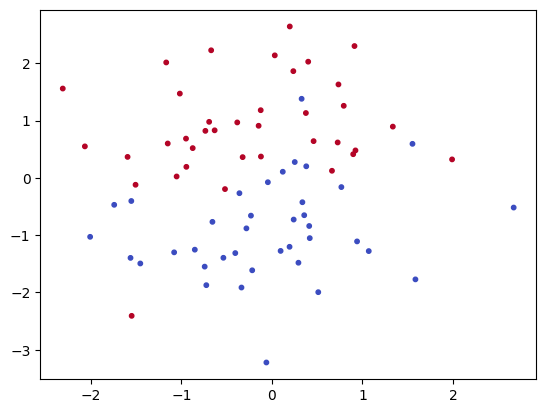

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", s=10)

In [30]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [31]:
pipe.score(X_test, y_test)

0.88

### MinMax Scaling

In [33]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [34]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [35]:
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [36]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)

In [37]:
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [38]:
min_max_scaler.scale_, min_max_scaler.min_

(array([0.5       , 0.5       , 0.33333333]),
 array([0.        , 0.5       , 0.33333333]))

In [42]:
feature_range = (-5, 5)

min_max_scaler = MinMaxScaler(feature_range=feature_range)

In [43]:
X = np.array([[1., 3., 3.]])

X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[-5., -5., -5.]])

In [45]:
X_minmax.min(), X_minmax.max()

(-5.0, -5.0)

In [57]:
np.sqrt(0.40**2 + 0.40 **2 + 0.8247 **2)

1.0000650428847115

## Normalization

In [58]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [59]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X, norm="l2")
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [64]:
for x in X_normalized:
    norm = 0
    for y in x:
        norm += y ** 2
    print(f"Norm for {x} is {norm}")

Norm for [ 0.40824829 -0.40824829  0.81649658] is 1.0000000000000002
Norm for [1. 0. 0.] is 1.0
Norm for [ 0.          0.70710678 -0.70710678] is 0.9999999999999998


### Encoding Categorical Features

In [65]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

In [68]:
X = [
    ["Red", "A", "Opera"],
    ["Green", "B", "Safari"],
    ["Blue", "C", "Brave"]
]
encoder.fit(X)

OrdinalEncoder()

In [73]:
encoder.transform([["Green", "A", "Opera"],["Blue", "C", "Brave"]])

array([[1., 0., 1.],
       [0., 2., 0.]])

In [71]:
encoder.categories_

[array(['Blue', 'Green', 'Red'], dtype=object),
 array(['A', 'B', 'C'], dtype=object),
 array(['Brave', 'Opera', 'Safari'], dtype=object)]

In [77]:
# using pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

enc = Pipeline(steps=[
    ("encoder", OrdinalEncoder()),
("imputer", SimpleImputer(strategy="constant", fill_value=-1))
])

enc.fit_transform([["A"], ["Green"], [np.nan]])

array([[ 0.],
       [ 1.],
       [-1.]])

### One Hot Encoder

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
X = [["A", "Nepalese"], ["B", "Foreign"]]

ohe = OneHotEncoder(handle_unknown="infrequent_if_exist") # all 000zeros if category is not there

ohe.fit(X)

OneHotEncoder(handle_unknown='infrequent_if_exist')

In [89]:
ohe.transform([["B", "Foreign"]]).toarray()

array([[0., 1., 1., 0.]])

In [88]:
ohe.categories_

[array(['A', 'B'], dtype=object), array(['Foreign', 'Nepalese'], dtype=object)]

In [90]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']

In [91]:
ohe = OneHotEncoder(categories=[genders, locations, browsers])
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]

ohe.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [92]:
ohe.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])